Data for this research project comes from a few sources:

- Zillow: https://www.zillow.com/research/data/
- Census.gov

Download all of the data here: https://cl.ly/3v1Y1Y0Q1L2t

1. price-to-rent-ratio.csv
1. rental-1-room.csv
1. rental-2-rooms.csv
1. rental-condo.csv
1. rental-median.csv
1. sales-median-listing.csv
1. sales-median-sold.csv
1. tx-vs-usa-economic-indicators.csv
1. usa-key-economic-indicators.csv

Interesting analysis done by The Economist: http://www.economist.com/blogs/graphicdetail/2016/08/daily-chart-20

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
% matplotlib inline

In [76]:
# This ratio is first calculated at the individual home level,
# where the estimated home value is divided by 12 times its estimated monthly rent price.
# The median of all home-level price-to-rent ratios for a given region is then calculated.

# Carl note: Example for a $100k home with $1,000 monthly rent: 100000/(12*1000) = 8.3
# If you could rent this same home for $1,200 instead, you'd get a ratio of 6.9
# Takeaway: A lower ratio is better!

# Let's load our data
price_to_rent = pd.read_csv('./data/price-to-rent-ratio.csv')

In [40]:
price_to_rent.head(1)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-10,2010-11,2010-12,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,10.0,9.91,9.73,...,11.72,11.77,12.14,12.17,12.21,12.34,12.54,12.61,12.57,12.64


In [42]:
# Drop the unecessary columns
price_to_rent_values = price_to_rent.drop(price_to_rent.columns[[0, 1, 2, 4, 5, 6]], axis=1)

# Calculate the average price-to-rent by state
avg_ptr_by_state = price_to_rent_values.groupby(['State']).mean()
avg_ptr_by_state.head(3)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
State,,,,,,,,,,,,,,,,,,,,,
AK,NaN,NaN,NaN,13.045000,12.548929,12.044643,11.950000,11.908571,11.908571,11.736071,...,11.991786,12.007500,12.053929,12.073214,12.110714,12.172500,12.334286,12.477857,12.582143,12.604643
AL,9.182391,9.130652,9.027609,8.956413,8.892717,8.906413,8.817174,8.756304,8.685109,8.675217,...,8.632935,8.674130,8.683804,8.672609,8.711848,8.771630,8.863043,8.939130,8.994674,8.988478
AR,10.559231,10.493846,10.404615,10.451154,10.433462,10.161154,9.909615,9.592692,9.629615,9.581923,...,9.085385,9.107692,9.143462,9.075385,9.156538,9.188077,9.198846,9.239615,9.310385,9.358846


In [48]:
# Look at the price-to-rent ration for the last month of data nationwide
avg_ptr_by_state['2017-02'].copy().sort_values()

State
MS     6.229259
MI     6.820800
OH     8.356572
MD     8.487143
IN     8.614087
AL     8.988478
SC     9.056500
AR     9.358846
MO     9.411308
WI     9.565541
KS     9.714211
VT     9.810000
NE     9.983600
GA    10.001892
TX    10.021692
PA    10.123959
KY    10.538571
RI    10.629545
FL    10.638245
NH    10.690000
IL    11.236467
CT    11.286379
NC    11.449242
TN    11.492022
LA    11.579541
NJ    11.820769
MN    12.053483
AK    12.604643
NM    13.542542
ID    13.664348
AZ    14.013391
UT    14.103889
NV    14.465263
DE    14.470000
VA    14.793118
MT    15.363500
MA    15.669467
CO    15.779107
DC    16.827079
NY    16.924207
OR    17.111776
WA    17.558258
CA    18.832180
HI    24.592222
Name: 2017-02, dtype: float64

In [58]:
# Compare the price-to-rent change from one year ago
# States with a higher percent change means they are now LESS attractive to buy from
ptr_change = (avg_ptr_by_state['2017-02'] - avg_ptr_by_state['2016-02']) / avg_ptr_by_state['2016-02'] * 100
ptr_change.sort_values()

State
MT    -4.556750
MS    -3.638135
KY     0.589739
GA     0.765126
CT     1.483629
SC     1.627111
RI     2.529814
ID     2.541682
CA     2.720984
IN     2.822208
UT     3.367264
AZ     3.456046
VA     3.481060
DE     3.653295
TX     3.759099
WA     3.843857
NH     4.038929
MN     4.429258
NC     4.526026
AR     5.105611
IL     5.163785
NV     5.196545
WI     5.269811
NE     5.414537
AK     5.677157
AL     5.764385
MA     5.780430
NJ     6.082955
DC     6.148732
PA     6.172577
MI     6.291556
NY     6.318674
TN     6.861209
MD     6.969978
HI     7.166029
LA     7.194300
MO     7.262231
FL     7.330639
OH     7.599596
OR     8.354718
KS     8.830929
NM     9.585528
CO    10.809263
VT    11.224490
dtype: float64

Though Vermont has had the fastest growing price-to-rent, the state remains relatively attractive with a ptr ratio of 9.81%.

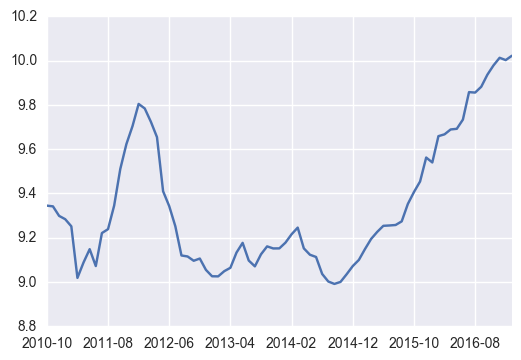

In [59]:
# Plot the price-to-rent in Texas
avg_ptr_by_state.loc["TX"].plot()

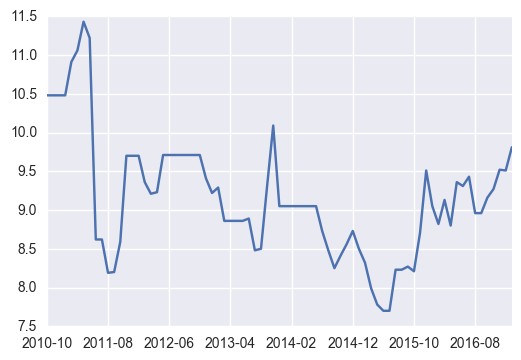

In [64]:
# Plot the price-to-rent in Vermont
# Note: The data has many NaN so we need to patch those
avg_ptr_by_state.loc["VT"].fillna(method="backfill").plot()

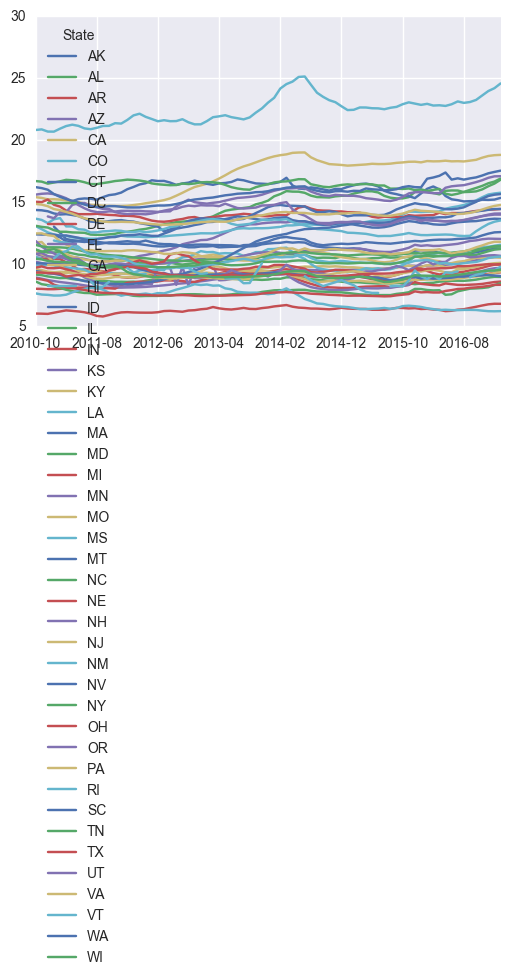

In [8]:
# Just for kicks, let's graph all the states
# Transpose the data so we can graph these over time
avg_ptr_by_state.T.plot()

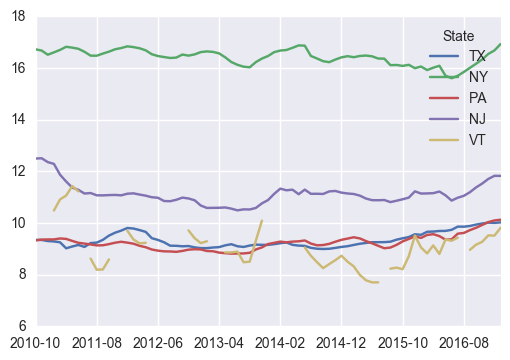

In [65]:
# Select specific states
avg_ptr_by_state.loc[["TX", "NY", "PA", "NJ", "VT"]].T.plot()

In [78]:
# Let's analyze Houston only
houston_ptr = price_to_rent[price_to_rent["City"] == "Houston"]

# Drop the current index and replace it with the regionname, this will allow us to plot these
houston_ptr = houston_ptr.set_index(houston_ptr["RegionName"])

# Remove unecessary columns
houston_ptr = houston_ptr.drop(houston_ptr.columns[[0, 1, 2, 3, 4, 5, 6]], axis=1)
houston_ptr.head(1)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
RegionName,,,,,,,,,,,,,,,,,,,,,
South Belt - Ellington,7.42,7.5,7.53,7.42,7.35,7.3,7.35,7.57,7.42,7.73,...,8.25,8.28,8.46,8.46,8.51,8.56,8.53,8.66,8.43,8.41


In [81]:
# Fill empty rows
houston_ptr = houston_ptr.fillna(0)
houston_ptr.head(1)

,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
RegionName,,,,,,,,,,,,,,,,,,,,,
South Belt - Ellington,7.42,7.5,7.53,7.42,7.35,7.3,7.35,7.57,7.42,7.73,...,8.25,8.28,8.46,8.46,8.51,8.56,8.53,8.66,8.43,8.41


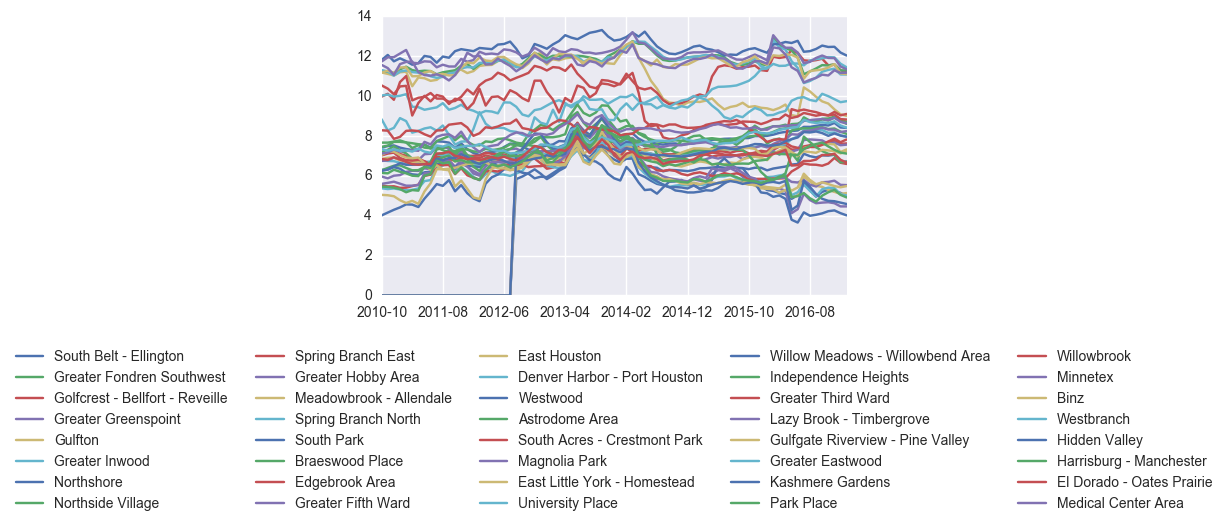

In [99]:
# Plot all houston hoods
ptr_houston = houston_ptr.T.plot()
box = ptr_houston.get_position()
ptr_houston.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]) # from stack overflow
ptr_houston.legend(loc='upper center', bbox_to_anchor=(0.5, -.15), ncol=5) # from stack overflow

In [100]:
# List all the regions we have. This will allow us to focus our research
houston_ptr.index

Index(['South Belt - Ellington', 'Greater Fondren Southwest',
       'Golfcrest - Bellfort - Reveille', 'Greater Greenspoint', 'Gulfton',
       'Greater Inwood', 'Northshore', 'Northside Village',
       'Spring Branch East', 'Greater Hobby Area', 'Meadowbrook - Allendale',
       'Spring Branch North', 'South Park', 'Braeswood Place',
       'Edgebrook Area', 'Greater Fifth Ward', 'East Houston',
       'Denver Harbor - Port Houston', 'Westwood', 'Astrodome Area',
       'South Acres - Crestmont Park', 'Magnolia Park',
       'East Little York - Homestead', 'University Place',
       'Willow Meadows - Willowbend Area', 'Independence Heights',
       'Greater Third Ward', 'Lazy Brook - Timbergrove',
       'Gulfgate Riverview - Pine Valley', 'Greater Eastwood',
       'Kashmere Gardens', 'Park Place', 'Willowbrook', 'Minnetex', 'Binz',
       'Westbranch', 'Hidden Valley', 'Harrisburg - Manchester',
       'El Dorado - Oates Prairie', 'Medical Center Area'],
      dtype='object', name

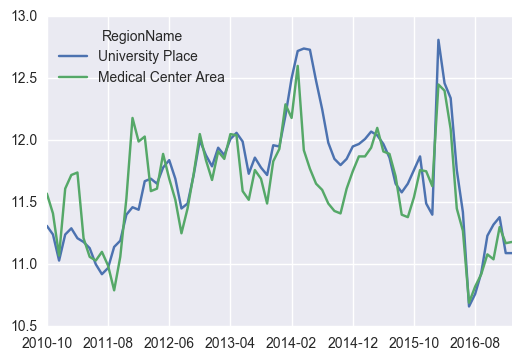

In [101]:
# Time to compare two areas we like
houston_ptr.loc[["University Place", "Medical Center Area"]].T.plot()

In [15]:
rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room.head(2)

,RegionName,City,State,Metro,CountyName,SizeRank,2010-02,2010-03,2010-04,2010-05,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
0,Northeast Dallas,Dallas,TX,Dallas-Fort Worth,Dallas,1,NaN,NaN,NaN,NaN,...,769.5,806.5,829.0,820.0,835.0,850.0,820.0,899.5,855.0,895.0
1,Paradise,Las Vegas,NV,Las Vegas,Clark,2,NaN,NaN,NaN,NaN,...,815.0,857.0,764.5,870.0,870.0,755.0,802.5,840.0,855.0,920.0


In [16]:
# Reset index
rental_1_room = rental_1_room[rental_1_room["City"] == "Houston"].set_index("RegionName")

# Drop unecessary colums
rental_1_room = rental_1_room.drop(rental_1_room.columns[[0,1,2,3,4]], axis=1)
rental_1_room = rental_1_room.fillna(0)

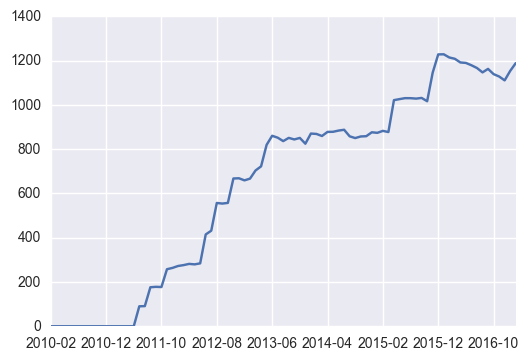

In [17]:
rental_1_room.mean().plot()

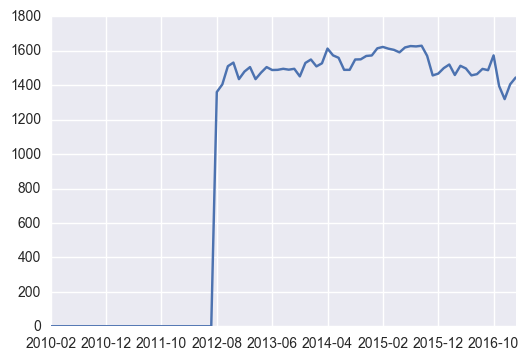

In [18]:
rental_1_room.loc["Midtown"].plot()

In [19]:
# Let's re-do this but for NYC

rental_1_room = pd.read_csv("./data/rental-1-room.csv")
rental_1_room = rental_1_room[rental_1_room["City"] == "New York"].set_index("RegionName")
rental_1_room = rental_1_room.drop(rental_1_room.columns[[0,1,2,3,4]], axis=1)
rental_1_room = rental_1_room.fillna(0)

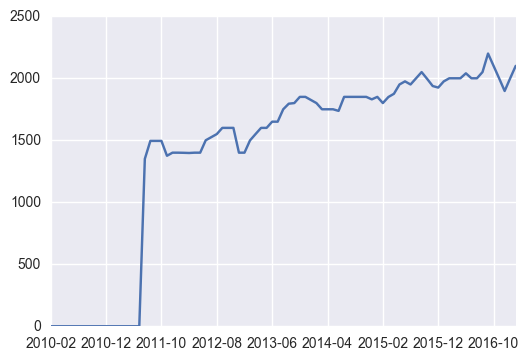

In [20]:
bushwick = rental_1_room.loc['Bushwick'].plot()

In [21]:
# Let's check a two bedroom apt
rental_2_room = pd.read_csv('./data/rental-2-rooms.csv')
rental_2_room = rental_2_room[rental_2_room["City"] == "Houston"].set_index("RegionName")
rental_2_room = rental_2_room.drop(rental_2_room.columns[[0,1,2,3,4]], axis=1)
rental_2_room = rental_2_room.fillna(0)

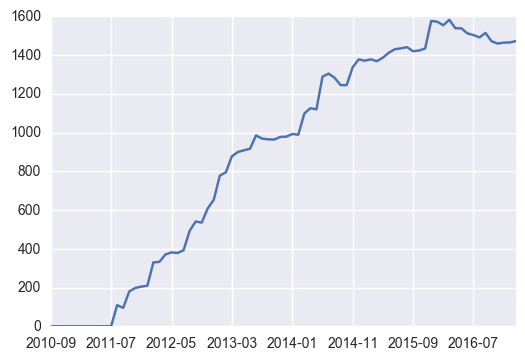

In [22]:
rental_2_room.mean().plot()

In [23]:
# Let's now compare 1 br with 2 br in houton

rental_1_room = pd.read_csv('./data/rental-1-room.csv')
rental_1_room = rental_1_room[rental_1_room["City"] == "Houston"].set_index("RegionName")
rental_1_room = rental_1_room.drop(rental_1_room.columns[[0,1,2,3,4]], axis=1)
rental_1_room = rental_1_room.fillna(0)

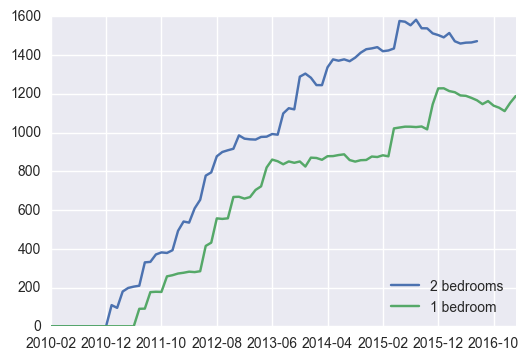

In [24]:
plot = rental_2_room.mean().plot()
rental_1_room.mean().plot(ax=plot)
plot.legend(["2 bedrooms", "1 bedroom"], loc="lower right")

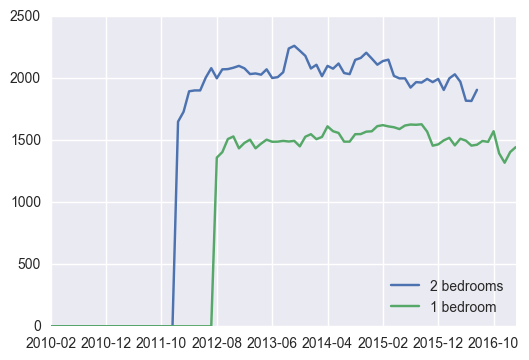

In [25]:
# Let's now do this just for midtown in houston

plot = rental_2_room.loc["Midtown"].plot()
rental_1_room.loc["Midtown"].plot(ax=plot)
plot.legend(["2 bedrooms", "1 bedroom"], loc="lower right")

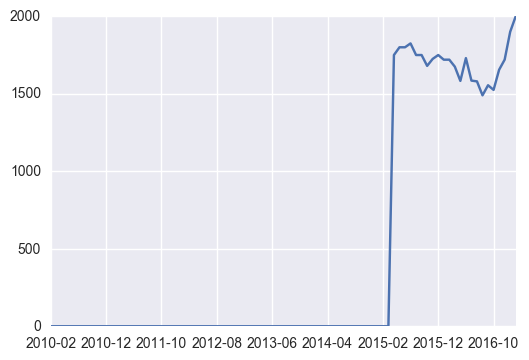

In [26]:
# Let's do downtown
# We only have data for 1 bedroom downtown
rental_1_room.loc["Downtown"].plot()

In [27]:
# Let's look at the rental listing mediam

rental_median = pd.read_csv("./data/rental-median.csv")
rental_median = rental_median.fillna(0)
tx_median = rental_median[rental_median["City"] == "Houston"].set_index("RegionName")
tx_median = tx_median.drop(["State", "City", "Metro", "CountyName", "SizeRank"], axis=1)
tx_median

,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,...,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02
RegionName,,,,,,,,,,,,,,,,,,,,,
Alief,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,845.0,850.0,847.5,875.0,800.0,852.5,837.5,865.0,925.0,1037.5
Sharpstown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,777.5,820.0,765.0,819.5,850.0,800.0,850.0,760.0,850.0,995.0
Eldridge - West Oaks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1575.0,1685.0,1560.5,1550.0,1560.5,1537.5,1499.0,1525.0,1550.0,1650.0
Central Southwest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1337.5,1425.0,1425.0,1350.0,1325.0,1400.0,1375.0,1375.0,1375.0,1399.0
Kingwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1685.0,1587.5,1650.0,1762.5,1600.0,1650.0,1575.0,1495.0,1587.0,1592.0
Clear Lake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1590.0,1600.0,1550.0,1650.0,1472.5,1450.0,1550.0,1500.0,1599.0,1599.0
Greater Fondren Southwest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750.0,759.0,750.0,770.0,750.0,759.0,750.0,770.0,875.0,950.0
Woodlake - Briarmeadow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,950.0,940.0,900.0,962.0,950.0,965.0,950.0,910.0,1050.0,1100.0
Greater Uptown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1515.0,1500.0,1500.0,1500.0,1580.0,1489.0,1497.0,1495.0,1595.0,1595.0


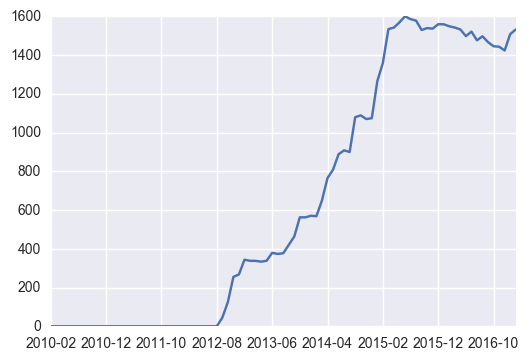

In [28]:
# Median renting price in houston
tx_median.mean().plot()

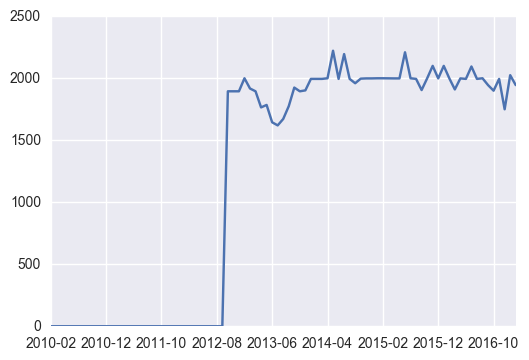

In [29]:
# Midtown for all apartment types
tx_median.loc["Midtown"].plot()

## Questions for realtor:

- Why hasn't midtown average rent price increased in the last 10 years?
  - Is it because it's already really expensive and new development is leading people to move in new neighborhoods?
- What areas are you expecting will grow the fastest in the next 5 years for rentals?


## Questions to answer with code:
- What are the fastest growing areas—in terms of rental price—in Houston?